In [102]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
import plotly.express as px

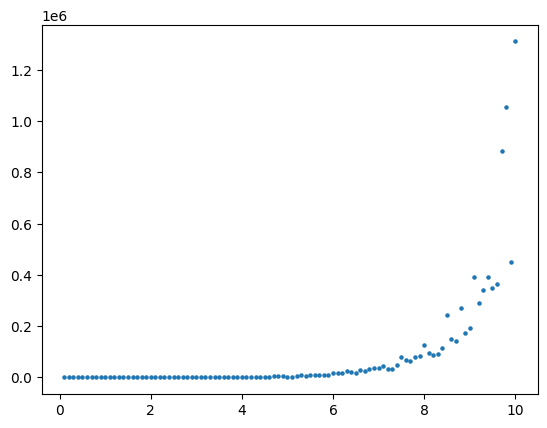

In [103]:
df = pd.read_csv("Data2.csv")

# "X" and "Y" are the list of all xi and yi respectively.
X = [float(item) for item in list(df['x'])]
Y = [float(item) for item in list(df['y'])]

plt.scatter(X, Y, s=5)
plt.show()

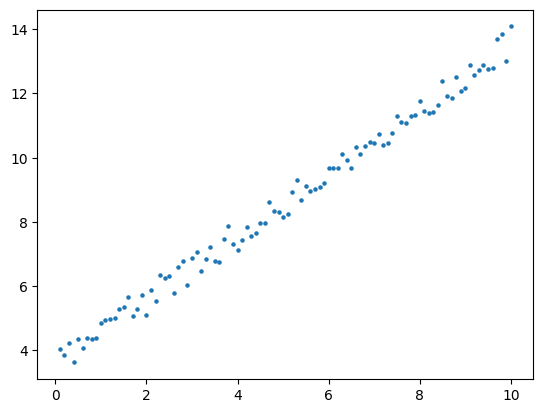

In [104]:
# L is the list of all log(yi).
L =[]
for i in Y:
    k = np.log(i) #log base e
    L.append(k)

plt.scatter(X, L, s=5)
plt.show()

In [105]:
XL=[]
X_square=[]

for i in range(100):
  q = X[i] * L[i]
  XL.append(q)

  p = X[i] ** 2
  X_square.append(p)

avg_XL = np.mean(XL)
avg_X = np.mean(X)
avg_L = np.mean(L)
avg_X_square = np.mean(X_square)

In [106]:
beta = (avg_XL - avg_X * avg_L)/(avg_X_square - avg_X ** 2) #It is value of m.
log_alpha = (avg_L - beta * avg_X)

alpha = np.exp(log_alpha)

print("value of beta :", beta)
# print("value of log_alpha :", log_alpha)
print("value of alpha :", alpha)

value of beta : 0.9729974518460589
value of alpha : 39.7306395177676


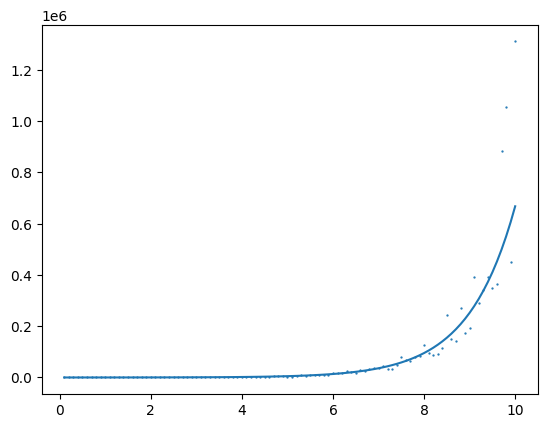

In [107]:
predicted_Y = []
for i in range(100):
  r = alpha * np.exp(beta * X[i])
  predicted_Y.append(r)

#plotting graph; Given data set is scatter but predicted dataset is in the form of line.
plt.scatter(X, Y, s=0.4, )
plt.plot(X, predicted_Y)

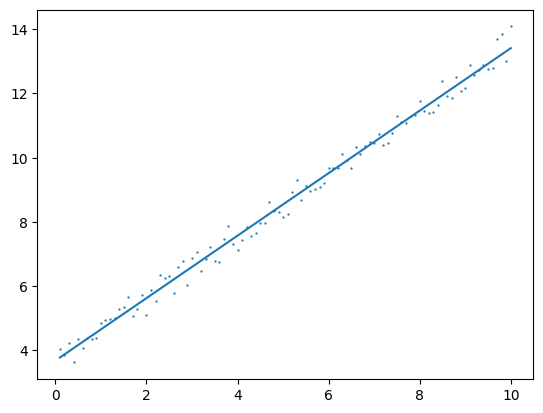

In [108]:
predicted_Y = []
for i in range(100):
#   r = alpha * np.exp(beta * X[i])
  y = np.log(alpha) + beta * X[i]
  r = y
  predicted_Y.append(r)

#plotting graph; Given data set is scatter but predicted dataset is in the form of line.
plt.scatter(X, L, s=0.4, )
plt.plot(X, predicted_Y)

# Verification

In [112]:
#Using linear Regression which is build by SkLearn.
regr = LinearRegression()

x_array = np.array(X).reshape(-1, 1)
y_array = np.array(L).reshape(-1, 1)

regr.fit(x_array,y_array)
print("beta: ",regr.coef_)
# print("Intercept: ",regr.intercept_)
alpha = np.exp(regr.intercept_)
print("alpha: ", alpha)

beta:  [[0.97299745]]
alpha:  [39.73063952]


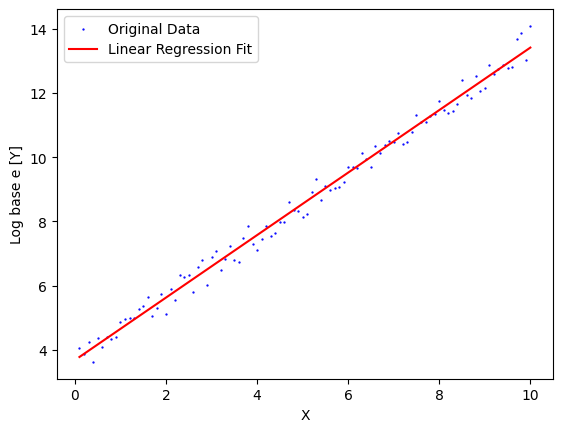

In [118]:
#Now predicting the value of every data.
y_pred_array = regr.predict(x_array)

y_pred_list = list(y_pred_array.reshape(1,-1)[0])

plt.scatter(X, L, s=0.4, color='blue', label='Original Data')
plt.plot(X, y_pred_list, color='red', label='Linear Regression Fit')

# plt.tick_params(left = False, bottom = False)
plt.xlabel('X')
plt.ylabel('Log base e [Y]')
plt.legend()
plt.show()

In [119]:
# Error between "prediction by SKLearn Regression model" and "given data."

mae = mean_absolute_error(y_true=y_array,y_pred=y_pred_array)
mse = mean_squared_error(y_true=y_array,y_pred=y_pred_array)
rmse = root_mean_squared_error(y_true=y_array,y_pred=y_pred_array)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.23498835289025738
MSE: 0.07643342704351966
RMSE: 0.27646596000867746


In [120]:
# Error between "prediction by My Own Regression model" and "given data."

mae = mean_absolute_error(y_true=y_array,y_pred=predicted_Y)
mse = mean_squared_error(y_true=y_array,y_pred=predicted_Y)
rmse = root_mean_squared_error(y_true=y_array,y_pred=predicted_Y)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.2349883528902577
MSE: 0.07643342704351971
RMSE: 0.27646596000867757


# It require a non-linear transformation of the input features.